# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 500.9/500.9 KB 8.2 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.1/269.1 KB 3.9 MB/s eta 0:00:0000:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 KB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 KB 5.6 MB/s eta 0:00:00
  Using cached requests-2.28.1-py3-none-any.whl (62 kB)
  Attempting uninstall: requests
    Found existing installation: requests 2.26.0
    Uninstalling requests-2.26.0:
      Successfully uninstalled requests-2.26.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.10.2 requires ruamel-yaml, which is not installed.
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 KB 9.7 MB/s eta 0:00:00
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [6]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [7]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [9]:
client = MongoClient(mongod_connect)
db = client.lab9 # use or create a database named demo
tweet_collection = db.tweet_collection #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [10]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [11]:
track = ['election'] # define the keywords, tweets contain election

locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [21]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print(status.id_str)
        try:
            tweet_collection.insert_one(status.json)
        except:
            pass
    def on_error(self,satus_code):
        if status_code==420:
            return false
myStreamListener=MyStreamListener()
myStream=tweepy.Stream(auth=strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)

AttributeError: module 'tweepy' has no attribute 'StreamListener'

## Use the REST API to Collect Tweets

Authorize the REST API 

In [22]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [23]:
count = 100 #number of returned tweets, default and max is 100
geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "election"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [24]:
search_results = rest_api.search.tweets( count=count,q=q, geocode=geocode) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Tue Nov 15 02:45:44 +0000 2022'
'Tue Nov 15 02:42:34 +0000 2022'
'Tue Nov 15 02:42:10 +0000 2022'
'Tue Nov 15 02:36:03 +0000 2022'
'Tue Nov 15 02:34:23 +0000 2022'
'Tue Nov 15 02:30:43 +0000 2022'
'Tue Nov 15 02:30:19 +0000 2022'
'Tue Nov 15 02:29:03 +0000 2022'
'Tue Nov 15 02:26:56 +0000 2022'
'Tue Nov 15 02:26:39 +0000 2022'
'Tue Nov 15 02:26:28 +0000 2022'
'Tue Nov 15 02:25:32 +0000 2022'
'Tue Nov 15 02:21:46 +0000 2022'
'Tue Nov 15 02:17:53 +0000 2022'
'Tue Nov 15 02:17:46 +0000 2022'
'Tue Nov 15 02:03:33 +0000 2022'
'Tue Nov 15 01:54:36 +0000 2022'
'Tue Nov 15 01:49:52 +0000 2022'
'Tue Nov 15 01:49:33 +0000 2022'
'Tue Nov 15 01:28:49 +0000 2022'
'Tue Nov 15 01:18:01 +0000 2022'
'Tue Nov 15 01:13:14 +0000 2022'
'Tue Nov 15 01:08:41 +0000 2022'
'Tue Nov 15 01:07:37 +0000 2022'
'Tue Nov 15 01:07:32 +0000 2022'
'Tue Nov 15 00:55:30 +0000 2022'
'Tue Nov 15 00:55:12 +0000 2022'
'Tue Nov 15 00:54:14 +0000 2022'
'Tue Nov 15 00:49:44 +0000 2022'
'Tue Nov 15 00:42:38 +0000 2022'
'Tue Nov 1

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [25]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        geocode=geocode, max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Mon Nov 14 15:44:52 +0000 2022'
'Mon Nov 14 15:41:43 +0000 2022'
'Mon Nov 14 15:39:32 +0000 2022'
'Mon Nov 14 15:37:30 +0000 2022'
'Mon Nov 14 15:21:14 +0000 2022'
'Mon Nov 14 15:19:25 +0000 2022'
'Mon Nov 14 15:12:46 +0000 2022'
'Mon Nov 14 15:08:36 +0000 2022'
'Mon Nov 14 15:04:21 +0000 2022'
'Mon Nov 14 15:01:58 +0000 2022'
'Mon Nov 14 15:01:34 +0000 2022'
'Mon Nov 14 14:55:46 +0000 2022'
'Mon Nov 14 14:45:17 +0000 2022'
'Mon Nov 14 14:44:00 +0000 2022'
'Mon Nov 14 14:39:37 +0000 2022'
'Mon Nov 14 14:35:59 +0000 2022'
'Mon Nov 14 14:33:04 +0000 2022'
'Mon Nov 14 14:21:41 +0000 2022'
'Mon Nov 14 14:13:51 +0000 2022'
'Mon Nov 14 14:13:15 +0000 2022'
'Mon Nov 14 14:06:50 +0000 2022'
'Mon Nov 14 14:06:03 +0000 2022'
'Mon Nov 14 14:00:22 +0000 2022'
'Mon Nov 14 13:37:05 +0000 2022'
'Mon Nov 14 13:30:44 +0000 2022'
'Mon Nov 14 13:11:32 +0000 2022'
'Mon Nov 14 12:51:29 +0000 2022'
'Mon Nov 14 12:48:41 +0000 2022'
'Mon Nov 14 12:48:34 +0000 2022'
'Mon Nov 14 12:46:33 +0000 2022'
'Mon Nov 1

'Sun Nov 13 04:43:48 +0000 2022'
'Sun Nov 13 04:40:54 +0000 2022'
'Sun Nov 13 04:25:41 +0000 2022'
'Sun Nov 13 04:19:25 +0000 2022'
'Sun Nov 13 04:13:54 +0000 2022'
'Sun Nov 13 04:09:41 +0000 2022'
'Sun Nov 13 04:07:12 +0000 2022'
'Sun Nov 13 03:59:18 +0000 2022'
'Sun Nov 13 03:58:35 +0000 2022'
'Sun Nov 13 03:55:35 +0000 2022'
'Sun Nov 13 03:50:32 +0000 2022'
'Sun Nov 13 03:43:25 +0000 2022'
'Sun Nov 13 03:37:26 +0000 2022'
'Sun Nov 13 03:31:11 +0000 2022'
'Sun Nov 13 03:29:24 +0000 2022'
'Sun Nov 13 03:25:44 +0000 2022'
'Sun Nov 13 03:23:27 +0000 2022'
'Sun Nov 13 03:23:00 +0000 2022'
'Sun Nov 13 03:22:23 +0000 2022'
'Sun Nov 13 03:20:11 +0000 2022'
'Sun Nov 13 03:20:08 +0000 2022'
'Sun Nov 13 03:14:50 +0000 2022'
'Sun Nov 13 03:13:53 +0000 2022'
'Sun Nov 13 03:06:57 +0000 2022'
'Sun Nov 13 03:05:33 +0000 2022'
'Sun Nov 13 03:02:22 +0000 2022'
'Sun Nov 13 03:01:19 +0000 2022'
'Sun Nov 13 03:00:30 +0000 2022'
'Sun Nov 13 02:54:37 +0000 2022'
'Sun Nov 13 02:54:23 +0000 2022'
'Sun Nov 1

'Fri Nov 11 18:31:04 +0000 2022'
'Fri Nov 11 18:28:32 +0000 2022'
'Fri Nov 11 18:11:44 +0000 2022'
'Fri Nov 11 17:44:24 +0000 2022'
'Fri Nov 11 17:39:58 +0000 2022'
'Fri Nov 11 17:38:06 +0000 2022'
'Fri Nov 11 17:26:53 +0000 2022'
'Fri Nov 11 17:19:12 +0000 2022'
'Fri Nov 11 17:12:07 +0000 2022'
'Fri Nov 11 17:09:57 +0000 2022'
'Fri Nov 11 17:09:40 +0000 2022'
'Fri Nov 11 17:07:16 +0000 2022'
'Fri Nov 11 17:00:48 +0000 2022'
'Fri Nov 11 16:53:09 +0000 2022'
'Fri Nov 11 16:49:10 +0000 2022'
'Fri Nov 11 16:46:51 +0000 2022'
'Fri Nov 11 16:39:04 +0000 2022'
'Fri Nov 11 16:26:07 +0000 2022'
'Fri Nov 11 16:10:11 +0000 2022'
'Fri Nov 11 16:04:19 +0000 2022'
'Fri Nov 11 16:04:03 +0000 2022'
'Fri Nov 11 15:58:09 +0000 2022'
'Fri Nov 11 15:30:57 +0000 2022'
'Fri Nov 11 15:23:10 +0000 2022'
'Fri Nov 11 15:09:06 +0000 2022'
'Fri Nov 11 15:07:55 +0000 2022'
'Fri Nov 11 14:48:03 +0000 2022'
'Fri Nov 11 14:46:27 +0000 2022'
'Fri Nov 11 14:43:11 +0000 2022'
'Fri Nov 11 14:27:47 +0000 2022'
'Fri Nov 1

'Thu Nov 10 13:19:16 +0000 2022'
'Thu Nov 10 13:17:25 +0000 2022'
'Thu Nov 10 13:08:57 +0000 2022'
'Thu Nov 10 13:02:19 +0000 2022'
'Thu Nov 10 13:01:16 +0000 2022'
'Thu Nov 10 12:53:04 +0000 2022'
'Thu Nov 10 12:48:37 +0000 2022'
'Thu Nov 10 12:39:00 +0000 2022'
'Thu Nov 10 12:27:25 +0000 2022'
'Thu Nov 10 12:25:28 +0000 2022'
'Thu Nov 10 12:08:36 +0000 2022'
'Thu Nov 10 12:02:41 +0000 2022'
'Thu Nov 10 12:02:25 +0000 2022'
'Thu Nov 10 11:28:56 +0000 2022'
'Thu Nov 10 11:22:27 +0000 2022'
'Thu Nov 10 11:07:59 +0000 2022'
'Thu Nov 10 11:07:51 +0000 2022'
'Thu Nov 10 11:06:52 +0000 2022'
'Thu Nov 10 11:05:02 +0000 2022'
'Thu Nov 10 10:44:13 +0000 2022'
'Thu Nov 10 09:34:35 +0000 2022'
'Thu Nov 10 08:12:38 +0000 2022'
'Thu Nov 10 08:06:58 +0000 2022'
'Thu Nov 10 08:04:18 +0000 2022'
'Thu Nov 10 07:02:22 +0000 2022'
'Thu Nov 10 06:31:49 +0000 2022'
'Thu Nov 10 06:30:45 +0000 2022'
'Thu Nov 10 06:24:45 +0000 2022'
'Thu Nov 10 06:07:08 +0000 2022'
'Thu Nov 10 05:57:15 +0000 2022'
'Thu Nov 1

'Wed Nov 09 16:30:40 +0000 2022'
'Wed Nov 09 16:29:42 +0000 2022'
'Wed Nov 09 16:24:57 +0000 2022'
'Wed Nov 09 16:24:52 +0000 2022'
'Wed Nov 09 16:23:46 +0000 2022'
'Wed Nov 09 16:23:44 +0000 2022'
'Wed Nov 09 16:23:02 +0000 2022'
'Wed Nov 09 16:21:32 +0000 2022'
'Wed Nov 09 16:20:28 +0000 2022'
'Wed Nov 09 16:20:17 +0000 2022'
'Wed Nov 09 16:18:56 +0000 2022'
'Wed Nov 09 16:14:28 +0000 2022'
'Wed Nov 09 16:13:48 +0000 2022'
'Wed Nov 09 16:12:08 +0000 2022'
'Wed Nov 09 16:06:12 +0000 2022'
'Wed Nov 09 16:01:50 +0000 2022'
'Wed Nov 09 15:59:13 +0000 2022'
'Wed Nov 09 15:57:31 +0000 2022'
'Wed Nov 09 15:57:23 +0000 2022'
'Wed Nov 09 15:53:55 +0000 2022'
'Wed Nov 09 15:53:12 +0000 2022'
'Wed Nov 09 15:48:18 +0000 2022'
'Wed Nov 09 15:42:35 +0000 2022'
'Wed Nov 09 15:32:04 +0000 2022'
'Wed Nov 09 15:29:04 +0000 2022'
'Wed Nov 09 15:27:34 +0000 2022'
'Wed Nov 09 15:25:49 +0000 2022'
'Wed Nov 09 15:25:36 +0000 2022'
'Wed Nov 09 15:21:38 +0000 2022'
'Wed Nov 09 15:21:16 +0000 2022'
'Wed Nov 0

'Wed Nov 09 03:37:43 +0000 2022'
'Wed Nov 09 03:36:48 +0000 2022'
'Wed Nov 09 03:36:48 +0000 2022'
'Wed Nov 09 03:36:25 +0000 2022'
'Wed Nov 09 03:35:29 +0000 2022'
'Wed Nov 09 03:31:03 +0000 2022'
'Wed Nov 09 03:31:02 +0000 2022'
'Wed Nov 09 03:29:31 +0000 2022'
'Wed Nov 09 03:28:24 +0000 2022'
'Wed Nov 09 03:26:25 +0000 2022'
'Wed Nov 09 03:23:36 +0000 2022'
'Wed Nov 09 03:19:58 +0000 2022'
'Wed Nov 09 03:19:21 +0000 2022'
'Wed Nov 09 03:16:34 +0000 2022'
'Wed Nov 09 03:15:53 +0000 2022'
'Wed Nov 09 03:12:27 +0000 2022'
'Wed Nov 09 03:12:23 +0000 2022'
'Wed Nov 09 03:12:22 +0000 2022'
'Wed Nov 09 03:10:32 +0000 2022'
'Wed Nov 09 03:07:43 +0000 2022'
'Wed Nov 09 03:07:40 +0000 2022'
'Wed Nov 09 03:04:59 +0000 2022'
'Wed Nov 09 03:03:37 +0000 2022'
'Wed Nov 09 03:03:29 +0000 2022'
'Wed Nov 09 03:01:33 +0000 2022'
'Wed Nov 09 03:00:16 +0000 2022'
'Wed Nov 09 02:59:43 +0000 2022'
'Wed Nov 09 02:57:53 +0000 2022'
'Wed Nov 09 02:56:50 +0000 2022'
'Wed Nov 09 02:55:23 +0000 2022'
'Wed Nov 0

'Tue Nov 08 21:28:46 +0000 2022'
'Tue Nov 08 21:27:51 +0000 2022'
'Tue Nov 08 21:23:50 +0000 2022'
'Tue Nov 08 21:21:21 +0000 2022'
'Tue Nov 08 21:12:25 +0000 2022'
'Tue Nov 08 21:11:12 +0000 2022'
'Tue Nov 08 21:07:01 +0000 2022'
'Tue Nov 08 21:05:21 +0000 2022'
'Tue Nov 08 21:04:10 +0000 2022'
'Tue Nov 08 21:03:44 +0000 2022'
'Tue Nov 08 21:01:23 +0000 2022'
'Tue Nov 08 21:01:09 +0000 2022'
'Tue Nov 08 21:00:53 +0000 2022'
'Tue Nov 08 21:00:28 +0000 2022'
'Tue Nov 08 20:59:28 +0000 2022'
'Tue Nov 08 20:56:56 +0000 2022'
'Tue Nov 08 20:55:33 +0000 2022'
'Tue Nov 08 20:53:50 +0000 2022'
'Tue Nov 08 20:53:08 +0000 2022'
'Tue Nov 08 20:52:56 +0000 2022'
'Tue Nov 08 20:51:29 +0000 2022'
'Tue Nov 08 20:51:06 +0000 2022'
'Tue Nov 08 20:49:48 +0000 2022'
'Tue Nov 08 20:44:02 +0000 2022'
'Tue Nov 08 20:41:40 +0000 2022'
'Tue Nov 08 20:41:35 +0000 2022'
'Tue Nov 08 20:41:21 +0000 2022'
'Tue Nov 08 20:36:02 +0000 2022'
'Tue Nov 08 20:32:40 +0000 2022'
'Tue Nov 08 20:31:42 +0000 2022'
'Tue Nov 0

'Tue Nov 08 13:58:56 +0000 2022'
'Tue Nov 08 13:58:34 +0000 2022'
'Tue Nov 08 13:58:03 +0000 2022'
'Tue Nov 08 13:57:58 +0000 2022'
'Tue Nov 08 13:57:52 +0000 2022'
'Tue Nov 08 13:54:48 +0000 2022'
'Tue Nov 08 13:54:10 +0000 2022'
'Tue Nov 08 13:51:25 +0000 2022'
'Tue Nov 08 13:49:52 +0000 2022'
'Tue Nov 08 13:48:36 +0000 2022'
'Tue Nov 08 13:47:32 +0000 2022'
'Tue Nov 08 13:47:15 +0000 2022'
'Tue Nov 08 13:46:56 +0000 2022'
'Tue Nov 08 13:46:45 +0000 2022'
'Tue Nov 08 13:45:36 +0000 2022'
'Tue Nov 08 13:44:47 +0000 2022'
'Tue Nov 08 13:44:14 +0000 2022'
'Tue Nov 08 13:44:06 +0000 2022'
'Tue Nov 08 13:44:04 +0000 2022'
'Tue Nov 08 13:43:31 +0000 2022'
'Tue Nov 08 13:42:06 +0000 2022'
'Tue Nov 08 13:41:58 +0000 2022'
'Tue Nov 08 13:41:47 +0000 2022'
'Tue Nov 08 13:40:51 +0000 2022'
'Tue Nov 08 13:40:00 +0000 2022'
'Tue Nov 08 13:37:40 +0000 2022'
'Tue Nov 08 13:37:33 +0000 2022'
'Tue Nov 08 13:36:00 +0000 2022'
'Tue Nov 08 13:33:02 +0000 2022'
'Tue Nov 08 13:32:58 +0000 2022'
'Tue Nov 0

'Mon Nov 07 20:40:35 +0000 2022'
'Mon Nov 07 20:37:27 +0000 2022'
'Mon Nov 07 20:37:24 +0000 2022'
'Mon Nov 07 20:37:10 +0000 2022'
'Mon Nov 07 20:35:28 +0000 2022'
'Mon Nov 07 20:34:32 +0000 2022'
'Mon Nov 07 20:33:59 +0000 2022'
'Mon Nov 07 20:30:27 +0000 2022'
'Mon Nov 07 20:27:28 +0000 2022'
'Mon Nov 07 20:25:07 +0000 2022'
'Mon Nov 07 20:21:18 +0000 2022'
'Mon Nov 07 20:21:16 +0000 2022'
'Mon Nov 07 20:19:50 +0000 2022'
'Mon Nov 07 20:19:02 +0000 2022'
'Mon Nov 07 20:18:03 +0000 2022'
'Mon Nov 07 20:12:00 +0000 2022'
'Mon Nov 07 20:10:31 +0000 2022'
'Mon Nov 07 20:02:44 +0000 2022'
'Mon Nov 07 20:01:18 +0000 2022'
'Mon Nov 07 19:58:39 +0000 2022'
'Mon Nov 07 19:39:24 +0000 2022'
'Mon Nov 07 19:37:04 +0000 2022'
'Mon Nov 07 19:10:10 +0000 2022'
'Mon Nov 07 19:08:02 +0000 2022'
'Mon Nov 07 19:06:32 +0000 2022'
'Mon Nov 07 19:06:15 +0000 2022'
'Mon Nov 07 19:06:11 +0000 2022'
'Mon Nov 07 19:05:00 +0000 2022'
'Mon Nov 07 19:01:22 +0000 2022'
'Mon Nov 07 18:57:40 +0000 2022'
'Mon Nov 0

'Sun Nov 06 16:47:08 +0000 2022'
'Sun Nov 06 16:46:14 +0000 2022'
'Sun Nov 06 16:44:36 +0000 2022'
'Sun Nov 06 16:12:21 +0000 2022'
'Sun Nov 06 16:11:53 +0000 2022'
'Sun Nov 06 16:04:40 +0000 2022'
'Sun Nov 06 15:58:10 +0000 2022'
'Sun Nov 06 15:56:11 +0000 2022'
'Sun Nov 06 15:35:05 +0000 2022'
'Sun Nov 06 15:30:55 +0000 2022'
'Sun Nov 06 15:29:19 +0000 2022'
'Sun Nov 06 15:27:04 +0000 2022'
'Sun Nov 06 15:02:03 +0000 2022'
'Sun Nov 06 14:58:32 +0000 2022'
'Sun Nov 06 14:51:51 +0000 2022'
'Sun Nov 06 14:50:27 +0000 2022'
'Sun Nov 06 14:48:12 +0000 2022'
'Sun Nov 06 14:45:26 +0000 2022'
'Sun Nov 06 14:43:27 +0000 2022'
'Sun Nov 06 14:29:12 +0000 2022'
'Sun Nov 06 14:27:57 +0000 2022'
'Sun Nov 06 14:20:30 +0000 2022'
'Sun Nov 06 14:10:27 +0000 2022'
'Sun Nov 06 13:55:24 +0000 2022'
'Sun Nov 06 13:45:37 +0000 2022'
'Sun Nov 06 13:31:06 +0000 2022'
'Sun Nov 06 13:13:46 +0000 2022'
'Sun Nov 06 12:41:25 +0000 2022'
'Sun Nov 06 12:16:13 +0000 2022'
'Sun Nov 06 11:13:29 +0000 2022'
'Sun Nov 0

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [26]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

2421
1050


Create a text index and print the Tweets containing specific keywords. 

In [27]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [28]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}}) # return tweets contain vote

Use pprint to display tweets

In [29]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Sheila
text: I voted!! Make your vote count and your voice to be heard! #voting #vote #election #elections2022 #votingrights… https://t.co/1WJNDgCUvl
----
name: fooddude
text: @ebznfloze @Garrett_Archer The majority of votes left to be counted were election day votes and drop off votes.
----
name: Robbie Cooper (Psn DatLie)
text: @Froskurinn Easy to lose when votes get counted days after election. If you can’t vote in person your not worth a vote
----
name: JesseGibsonforAR
text: It’s Election Day in Arkansas!  Get out and vote, vote, VOTE!  #jg4ag #arpx. #arkansas https://t.co/0zCtq6wY9C
----
name: Ty Kinney
text: @LePetiteLeRoux The rest of the votes are from heavily Republican districts, or votes from people who voted today(R… https://t.co/ALDUFjeY9m
----
name: Hugh Wiggins
text: Call your state representatives and hammer them on doing away with early voting ,mail in voting absentee voting for… https://t.co/R0C68Jvhjt
----
name: Madison Center for Civic Engagement
text: E

In [30]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}}) # return tweets contain vote

Use pandas to display tweets

In [31]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status
0,6372fdf45e27388f533e9508,Tue Nov 08 14:43:36 +0000 2022,1589992036643512320,1589992036643512320,I voted!! Make your vote count and your voice ...,True,"{'hashtags': [{'text': 'voting', 'indices': [5...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://instagram.com"" rel=""nofollow"">...",NaN,...,0,0,False,False,False,en,NaN,NaN,NaN,NaN
1,6372fddf5e27388f533e90d5,Thu Nov 10 21:26:35 +0000 2022,1590818226208116736,1590818226208116736,@ebznfloze @Garrett_Archer The majority of vot...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.590783e+18,...,0,0,False,False,NaN,en,NaN,NaN,NaN,NaN
2,6372fdd45e27388f533e8ea2,Mon Nov 14 00:28:01 +0000 2022,1591951047618068480,1591951047618068480,@Froskurinn Easy to lose when votes get counte...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.591675e+18,...,0,0,False,False,NaN,en,NaN,NaN,NaN,NaN
3,6372fdf65e27388f533e955a,Tue Nov 08 13:04:30 +0000 2022,1589967097861312513,1589967097861312513,It’s Election Day in Arkansas! Get out and vo...,False,"{'hashtags': [{'text': 'jg4ag', 'indices': [63...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,44,144,False,False,False,en,"{'media': [{'id': 1589966908731834370, 'id_str...",NaN,NaN,NaN
4,6372fdea5e27388f533e930e,Wed Nov 09 04:38:58 +0000 2022,1590202263532077056,1590202263532077056,@LePetiteLeRoux The rest of the votes are from...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.590202e+18,...,0,0,False,False,NaN,en,NaN,NaN,NaN,NaN
5,6372fdd35e27388f533e8e7d,Mon Nov 14 04:35:36 +0000 2022,1592013352208842752,1592013352208842752,Call your state representatives and hammer the...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,0,False,False,NaN,en,NaN,NaN,NaN,NaN
6,6372fdfa5e27388f533e9620,Mon Nov 07 21:09:04 +0000 2022,1589726652883668992,1589726652883668992,Episode 3 of the student-led Dukes Vote Podcas...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,2,False,False,False,en,NaN,NaN,NaN,NaN
7,6372fdfa5e27388f533e9648,Mon Nov 07 18:57:40 +0000 2022,1589693583409352706,1589693583409352706,Say yes to voting. Tomorrow is Election Day ge...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,4,5,False,False,False,en,NaN,NaN,NaN,NaN
8,6372fdfa5e27388f533e9629,Mon Nov 07 20:48:19 +0000 2022,1589721430534811649,1589721430534811649,GO VOTE TOMORROW! We have to win this election...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,3,1,False,False,NaN,en,NaN,NaN,NaN,NaN
9,6372fdfc5e27388f533e9682,Mon Nov 07 16:09:08 +0000 2022,1589651173774184448,1589651173774184448,Tomorrow is Election Day! If you haven’t voted...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://www.hubspot.com/"" rel=""nofollo...",NaN,...,0,0,False,False,False,en,NaN,NaN,NaN,NaN


<AxesSubplot:>

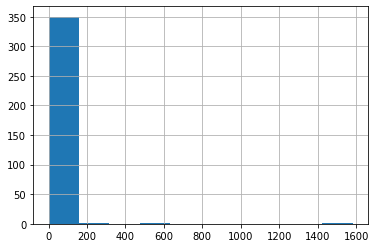

In [32]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count